In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
Measurement_data = session.query(Measurement).first()
Measurement_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x272cb3c4be0>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08}

In [10]:
session.query(Measurement.prcp).all()

[(0.08,),
 (0.0,),
 (0.0,),
 (0.0,),
 (None,),
 (0.06,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.04,),
 (0.12,),
 (0.0,),
 (None,),
 (0.03,),
 (0.01,),
 (None,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.02,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (None,),
 (0.03,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.12,),
 (0.08,),
 (0.03,),
 (0.0,),
 (0.43,),
 (0.06,),
 (None,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.06,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (None,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.17,),
 (0.15,),
 (0.27,),
 (0.01,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.01,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.04,),
 (0.01,),
 (0.0,),
 (0.02,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.03,),
 (0.2,),

In [11]:
session.query(Measurement.date, Measurement.prcp).first()

('2010-01-01', 0.08)

# Exploratory Precipitation Analysis

In [46]:
# Find the most recent date in the data set.

first_data = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
first_data



('2017-08-23',)

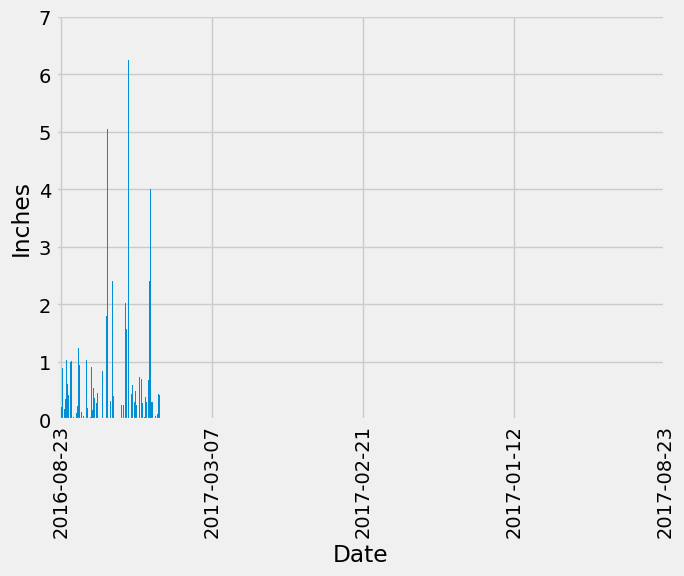

In [49]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data_query = f"""
SELECT date, prcp
FROM Measurement
WHERE date >= '{one_year_ago}'
"""

# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_and_prcp_df = pd.read_sql(data_query, engine)
date_and_prcp_df.columns = ['date', 'precipitation']
# Sort the dataframe by date
# -- Already sorted from SQL query?--

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(7, 5))
plt.bar(date_and_prcp_df['date'], date_and_prcp_df['precipitation'])
tick_indices = np.linspace(0, len(date_and_prcp_df) -1 , 5)


desired_dates =  date_and_prcp_df['date'].iloc[tick_indices]
plt.xticks(ticks=tick_indices, labels=desired_dates, rotation=90)

plt.ylabel('Inches')
plt.xlabel('Date')
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = date_and_prcp_df.describe()
summary_stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
print(total_stations)

# Alternative ending using .scalar() suggested by XpertLearning Assistant
total_stations_scalar = session.query(func.count(Station.station)).scalar()
print(total_stations_scalar)

[(9,)]
9


In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = (
    session.query(Station.station, func.count(Measurement.station))
    .select_from(Station)
    .outerjoin(Measurement, Station.station == Measurement.station)
    .group_by(Station.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)
station_counts


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Change visual display with for loop
for station, count in station_counts:
    print(f'Station: {station}, Row Count: {count}')

Station: USC00519281, Row Count: 2772
Station: USC00519397, Row Count: 2724
Station: USC00513117, Row Count: 2709
Station: USC00519523, Row Count: 2669
Station: USC00516128, Row Count: 2612
Station: USC00514830, Row Count: 2202
Station: USC00511918, Row Count: 1979
Station: USC00517948, Row Count: 1372
Station: USC00518838, Row Count: 511


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_query = f"""
    SELECT 
    MIN(tobs) AS lowest_temperature,
    MAX(tobs) AS highest_temperature,
    AVG(tobs) AS average_temperature
FROM 
    Measurement
WHERE 
    station = '{station_counts[0][0]}';
    """

with engine.connect() as connection:
    result = connection.execute(most_active_station_query)
    results_list = result.fetchall()

results_list


[(54.0, 85.0, 71.66378066378067)]

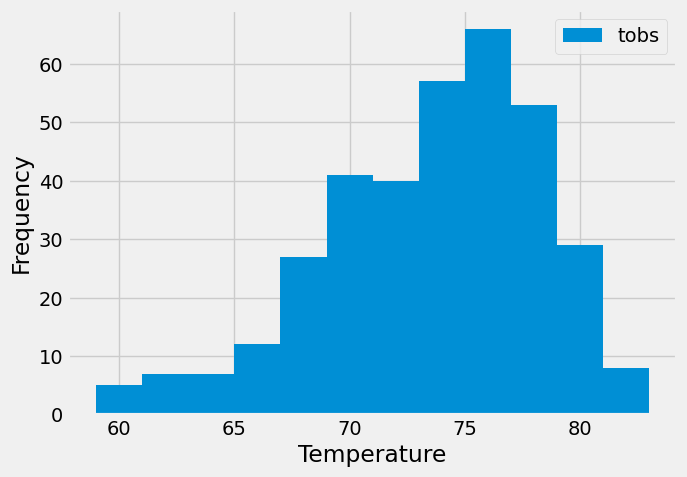

In [43]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#first_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#first_data

histogram_data_query = f"""
SELECT tobs
FROM Measurement
WHERE date >= '{one_year_ago}'
AND station = '{station_counts[0][0]}'
"""

histogram_df = pd.read_sql(histogram_data_query, engine)
histogram_df.columns = ['tobs']

plt.figure(figsize=(7, 5))
plt.hist(histogram_df['tobs'], bins = 12, label='tobs')

plt.legend(loc = 'upper right')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()


# Close Session

In [51]:
# Close Session
session.close()